## Import Libaries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from pathlib import Path

## Process Data

In [3]:
# loops through each directory printing the number directories and  images they each contain
for (dirpath,dirnames,filenames) in os.walk("/kaggle/input/natural-images/natural_images"):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 8 directories and 0 images in '/kaggle/input/natural-images/natural_images'
There are 0 directories and 788 images in '/kaggle/input/natural-images/natural_images/motorbike'
There are 0 directories and 727 images in '/kaggle/input/natural-images/natural_images/airplane'
There are 0 directories and 843 images in '/kaggle/input/natural-images/natural_images/flower'
There are 0 directories and 702 images in '/kaggle/input/natural-images/natural_images/dog'
There are 0 directories and 1000 images in '/kaggle/input/natural-images/natural_images/fruit'
There are 0 directories and 968 images in '/kaggle/input/natural-images/natural_images/car'
There are 0 directories and 885 images in '/kaggle/input/natural-images/natural_images/cat'
There are 0 directories and 986 images in '/kaggle/input/natural-images/natural_images/person'


### Creating a list of all image paths

In [4]:


data_path = Path("/kaggle/input/natural-images/natural_images")

image_path_list = list(data_path.glob("*/*.jpg"))

print(*image_path_list[:10],sep="\n")

/kaggle/input/natural-images/natural_images/motorbike/motorbike_0786.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0344.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0360.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0010.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0125.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0211.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0135.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0769.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0146.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0456.jpg


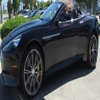

In [5]:
from PIL import Image
import random

image_rand = random.choice(image_path_list)

img = Image.open(image_rand)

img

In [6]:
# convert image to numpy array
img_as_array = np.asarray(img)

img_as_array

array([[[ 70,  73,  62],
        [ 92, 104, 102],
        [180, 205, 227],
        ...,
        [ 70,  85,  88],
        [106, 123, 133],
        [106, 124, 138]],

       [[ 61,  63,  52],
        [133, 143, 142],
        [196, 221, 241],
        ...,
        [ 73,  88,  93],
        [132, 150, 162],
        [ 74,  93, 108]],

       [[ 90,  90,  80],
        [177, 186, 185],
        [199, 222, 240],
        ...,
        [ 82,  99, 107],
        [132, 151, 166],
        [127, 148, 165]],

       ...,

       [[ 32,  40,  53],
        [ 35,  43,  56],
        [ 33,  41,  52],
        ...,
        [213, 210, 203],
        [210, 209, 204],
        [211, 210, 205]],

       [[ 35,  45,  57],
        [ 35,  45,  57],
        [ 31,  41,  51],
        ...,
        [217, 214, 207],
        [215, 214, 209],
        [214, 213, 208]],

       [[ 37,  47,  59],
        [ 33,  43,  55],
        [ 31,  41,  51],
        ...,
        [218, 215, 208],
        [217, 216, 211],
        [216, 215, 210]]

### Transform the data 

In [7]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [8]:
data_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    
])

In [9]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [10]:
# plots both the original and transformed images
def plot_transformed_images(image_paths,transform,num=3,random_seed=42):
    if random_seed:
        random.seed(random_seed)
    image_path_list = random.sample(image_paths,k=num)
    
    for image_path in image_path_list:
        with Image.open(image_path) as f:
          figure,axis = plt.subplots(1,2)
          axis[0].imshow(f)
          axis[0].set_title(f"Original \n Size: {f.size}")
          axis[0].axis("off")

          # Transform and plot image
          transformed_image = transform(f).permute(1,2,0) # only works if we change the color dimension to last
          axis[1].imshow(transformed_image)
          axis[1].set_title(f"Transformed \n Size: {transformed_image.shape}")
          axis[1].axis("off")

          figure.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)


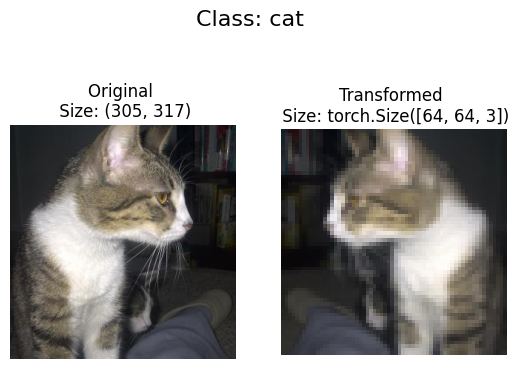

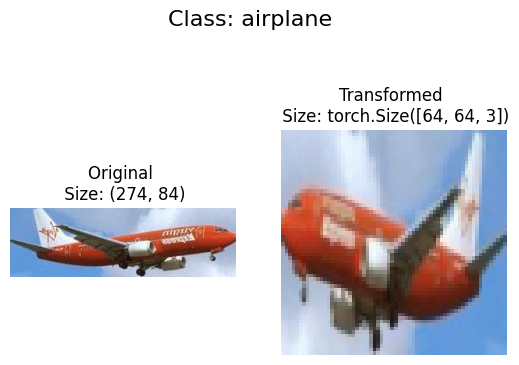

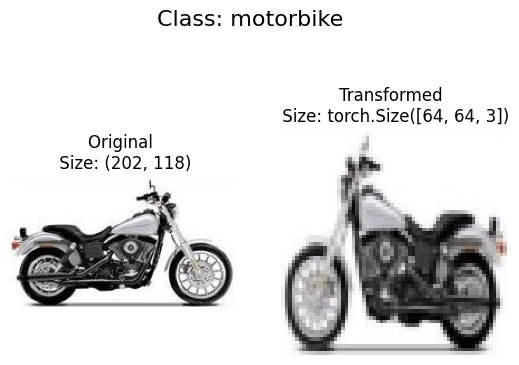

In [11]:
plot_transformed_images(image_path_list,data_transform)

## Load images from folders using *ImageFolder*

In [12]:
data = datasets.ImageFolder(root = "/kaggle/input/natural-images/natural_images",
                                  transform = data_transform)


train_data,test_data = train_test_split(data,test_size=0.2)

In [13]:
train_data[:10]

[(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
  
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
  
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]]),
  5),
 (tensor([[[0.5961, 0.3529, 0.3255,  ..., 0.6157, 0.7176, 0.7412],
           [0.5098, 0.2745, 0.2863,  ..., 0.6980, 0.7333, 0.6941],
           [0.4039, 0.2588,

## Batching data using DataLoader

In [14]:
# Batching data required to speed up training process

train_dataLoader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=1,

                              )


test_dataLoader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False,
                             num_workers=1
                             )

In [15]:
len(train_dataLoader),len(test_dataLoader)

(173, 44)

In [16]:
for i, (image,label) in enumerate(train_dataLoader):
    print(f"Image:  {image}\nLabel: {label}")
    if i == 2:
        break

Image:  tensor([[[[0.1843, 0.1608, 0.1451,  ..., 0.6510, 0.6471, 0.6824],
          [0.2118, 0.1804, 0.1451,  ..., 0.7020, 0.6863, 0.6980],
          [0.2118, 0.1882, 0.1333,  ..., 0.5647, 0.5412, 0.5333],
          ...,
          [0.7490, 0.7412, 0.7333,  ..., 0.7098, 0.7137, 0.7255],
          [0.7569, 0.7490, 0.7412,  ..., 0.6824, 0.7059, 0.7216],
          [0.7569, 0.7529, 0.7608,  ..., 0.6980, 0.7020, 0.7333]],

         [[0.1647, 0.1451, 0.1294,  ..., 0.4549, 0.4353, 0.4549],
          [0.1961, 0.1725, 0.1294,  ..., 0.4667, 0.4627, 0.4706],
          [0.1961, 0.1765, 0.1176,  ..., 0.3294, 0.3255, 0.3255],
          ...,
          [0.6863, 0.6784, 0.6745,  ..., 0.6471, 0.6510, 0.6627],
          [0.6941, 0.6863, 0.6824,  ..., 0.6235, 0.6431, 0.6588],
          [0.6941, 0.6902, 0.6980,  ..., 0.6392, 0.6392, 0.6706]],

         [[0.1569, 0.1412, 0.1255,  ..., 0.3608, 0.3412, 0.3255],
          [0.1922, 0.1647, 0.1255,  ..., 0.3647, 0.3569, 0.3569],
          [0.1922, 0.1725, 0.1098,

## Building a model using ResNet50

In [27]:
from torchvision import models
import torch

model = models.resnet50(weights = None)

num_classes = 8

# Changing the output to match the number of classes as this was built with ImageNet thereby output is 1000
model.fc = torch.nn.Linear(model.fc.in_features, num_classes) 


## Creating Loss and optimizer functions

In [18]:
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

### Testing output of model

In [19]:
image_batch, label_batch = next(iter(train_dataLoader))

torch.argmax(torch.softmax(model(image_batch),dim=1),dim=1)

tensor([6, 2, 2, 6, 6, 6, 2, 0, 2, 0, 6, 2, 0, 2, 6, 0, 6, 2, 0, 0, 2, 0, 2, 2,
        6, 6, 6, 0, 0, 0, 4, 0])

## Creating the training method

In [20]:
def training(model,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            train_dataLoader: torch.utils.data.DataLoader 
            ):
        

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        model.train()

       
        train_loss,train_acc = 0,0
        for batch, (image,label) in enumerate(train_dataLoader):
            image,label = image.to(device),label.to(device)

            y_pred = model(image)

            loss = loss_fn(y_pred,label)

            train_loss += loss.item()

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1) # this is to get it into prediction labels

            train_acc += (y_pred_class==label).sum().item()/len(y_pred)
            
        train_loss = train_loss / len(train_dataLoader)
        train_acc = train_acc / len(train_dataLoader)

        return train_loss,train_acc


        
        
        
        
    

## Creating the testing method

In [21]:
def testing(model,
            loss_fn: torch.nn.Module,
            test_dataLoader: torch.utils.data.DataLoader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    model.eval()
    
    with torch.inference_mode():
        test_loss,test_acc = 0,0
        
        for batch, (image,label) in enumerate(test_dataLoader):
            image,label = image.to(device),label.to(device)
            
            test_pred = model(image)
            
            loss = loss_fn(test_pred,label)
            
            test_loss += loss.item()
            
            test_pred_labels = torch.argmax(torch.softmax(test_pred,dim=1),dim=1)

            test_acc += (test_pred_labels==label).sum().item()/len(test_pred)

        test_loss = test_loss / len(test_dataLoader)
        test_acc = test_acc / len(test_dataLoader)

        return test_loss,test_acc

## Training the model 

In [22]:
from tqdm.auto import tqdm

def train_model(model,
            loss_fn: torch.nn.Module,
            optimizer: torch.optim.Optimizer,
            train_dataLoader: torch.utils.data.DataLoader,
            test_dataLoader: torch.utils.data.DataLoader,
            epochs:int = 20
               ):
    
    torch.manual_seed(42)
    
    results = {
      "train_loss":[],
      "train_acc":[],
      "test_loss":[],
      "test_acc":[]
    }
    
    
    for epoch in tqdm(range(epochs)):
        train_loss,train_acc = training(model,loss_fn,optimizer,train_dataLoader)
        test_loss,test_acc = testing(model,loss_fn,test_dataLoader)
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
        

    return results
        

## Running the model and outputing the results

In [23]:
model_0_results = train_model(model,loss_fn,optimizer,train_dataLoader,test_dataLoader,epochs=5)

print(model_0_results)

  0%|          | 0/5 [00:00<?, ?it/s]

{'train_loss': [1.1009599557846268, 0.47011612941419456, 0.37572826393422365, 0.31394465129844024, 0.3006968895091831], 'train_acc': [0.6274566473988439, 0.8315751445086705, 0.8696652215799614, 0.8947976878612718, 0.8991811175337188], 'test_loss': [0.5172433859922669, 0.5668294910680164, 0.4223904508081349, 0.3169251141900366, 0.30707502382045443], 'test_acc': [0.8110795454545454, 0.8117897727272727, 0.8444602272727273, 0.8714488636363636, 0.8863636363636364]}


## Plotting results of the model 

In [24]:
def plot_results(results):
    
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]
    train_acc = results["train_acc"]
    test_acc = results["test_acc"]
    
    epochs = range(len(results["test_loss"]))
    
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.plot(epochs,train_loss,label="Train loss")
    plt.plot(epochs,test_loss,label="Test loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs,train_acc,label="Train accuracy")
    plt.plot(epochs,test_acc,label="Test accuracy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend()
    


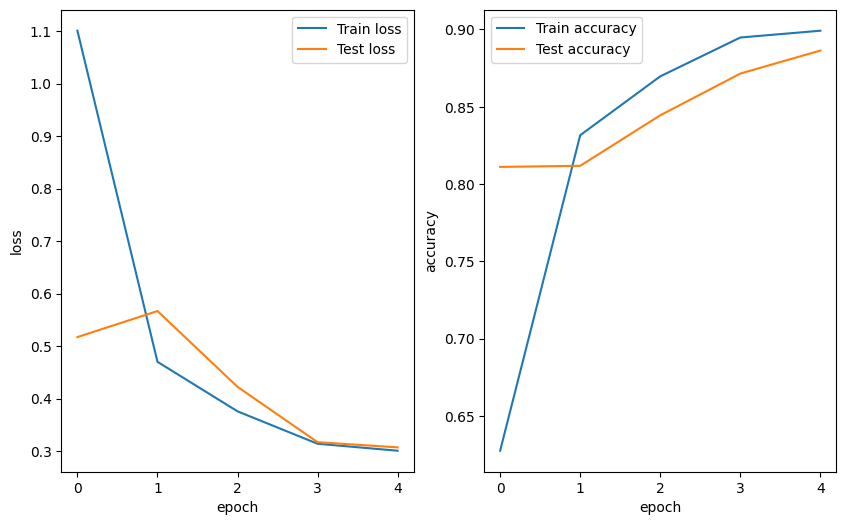

In [25]:
plot_results(model_0_results)